# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('D:\ds\mipt\Advertising.csv',index_col=0)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

<div style="border: 1px solid red; padding: 10px; border-radius: 5px;">

### Описание алгоритма:

**1. Инициализируем вектор с весами `w`.**
- определяется как вектор-столбец, количество признаков в котором соответствует размерности `X` 
- на начальном этапе заполняется нулями<br><br>

**2. Инициализируем цикл.**
- внешний цикл контролирует количество итераций 
- внутренний цикл перебирает столбцы с признаками<br><br>

**3. Инициализируем вектор остатков `r`.**
- хранит разницу между реальными и предсказанными значениями
- будет обновляться на каждой итерации для корректировки весов, чтобы минимизировать ошибку предсказания<br><br>

**4. Вычисляем остатки без учета вклада текущего признака `r_minus_j`.**
- `r` — это текущий вектор остатков.
- `X[:,j:j+1]` — это срез матрицы `X`, который извлекает j-й столбец в виде двумерного массива.
- `w[j]` — это текущий вес для j-го признака.
- `X[:,j:j+1]∗w[j]` здесь происходит поэлементное умножение столбца j-го признака на его текущий вес.<br>
   Результат — вектор, который показывает вклад j-го признака в предсказанные значения для каждого наблюдения.
- `r+X[:,j:j+1]∗w[j]` здесь мы добавляем обратно вклад текущего j-го признака к остаткам `r`.<br> 
   По сути мы как бы возвращаем вклад j-го признака в целевую переменную и исключаем его из разности в векторе остатков.<br><br>

**5. Обновляем текущий `w[j]`.**
- `X[:, j].T @ r_minus_j` произведение вектора признака и вектора остатков без учёта признака.<br>
   Это даст нам скалярное значение, которое отражает, насколько хорошо j-й признак объясняет остатки.
- `X[:,j].T@X[:,j]` — это норма j-го признака. Она показывает, насколько сильно варьируется признак.<br> 
   Если признак имеет большую дисперсию, его влияние будет больше, и для коррекции веса `w[j]` это учитывается.<br>
   Так как признаки в нашем случае нормализованы изначально, то в целом этого можно было бы и не делать, упростив вычисления.
- Делим числитель на знаменатель и тем самым обновляем вес `w[j]` так, чтобы минимизировать остатки, с учётом того, насколько j-й признак коррелирует с остатками.

</div>

In [7]:
def coordinate_descent(X, y, iters):
    
    y = y.reshape(-1, 1)
    w = np.zeros((X.shape[1], 1)) 

    for i in range(iters):
        for j in range(X.shape[1]):
            r = y - X @ w 
            r_minus_j = r + X[:, j:j+1] * w[j] 
            w[j] = (X[:, j].T @ r_minus_j) / (X[:, j].T @ X[:, j])
            
        cost = np.mean((X @ w - y) ** 2)

        if i % 100 == 0:
            print(f"Итерация {i}, MSE: {cost:.4f}")
            
    return w.flatten()

result = coordinate_descent(X, y, 1000)
print("Оптимальные веса:", result)

Итерация 0, MSE: 22.1455
Итерация 100, MSE: 2.7841
Итерация 200, MSE: 2.7841
Итерация 300, MSE: 2.7841
Итерация 400, MSE: 2.7841
Итерация 500, MSE: 2.7841
Итерация 600, MSE: 2.7841
Итерация 700, MSE: 2.7841
Итерация 800, MSE: 2.7841
Итерация 900, MSE: 2.7841
Оптимальные веса: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [8]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

<div style="border: 1px solid red; padding: 10px; border-radius: 5px;">

### Вывод:
Ещё до 100-й итерации алгоритм координатного спуска пришёл к таким же значениям как и модель линейной регресси из библиотеки.
</div>

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [9]:
X = df[['TV', 'radio', 'newspaper']].values
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_scaled = (X - means) / stds

**Добавим единичный столбец**

In [10]:
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [11]:
def mse_error(y, y_pred):
    return np.mean((y-y_pred)**2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [12]:
mean_sales = np.mean(y)
y_pred = [mean_sales] * len(y)
mse = mse_error(y, y_pred)
print("Наивный прогноз:", y_pred[0])
print("Среднеквадратичная ошибка (MSE) для наивного прогноза:", mse)

Наивный прогноз: 14.0225
Среднеквадратичная ошибка (MSE) для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [38]:
def lin_pred(X, w):
    return X @ w

w = coordinate_descent(X_scaled, y, 101)
predictions = (lin_pred(X_scaled, w))
mse = mse_error(y, predictions)

print("Среднеквадратичная ошибка (MSE) для линейного прогноза:", mse)
print("\nПрогнозы:", predictions)

Итерация 0, MSE: 2.8071
Итерация 100, MSE: 2.7841
Среднеквадратичная ошибка (MSE) для линейного прогноза: 2.784126314510936

Прогнозы: [20.52397441 12.33785482 12.30767078 17.59782951 13.18867186 12.47834763
 11.72975995 12.12295317  3.72734086 12.55084872  7.0322992  17.28512918
 10.57712073  8.82630048 18.43436638 20.81929952 12.82365674 23.22495716
  9.95168206 14.16607293 18.10076728 14.7405382   6.4891503  16.5459329
  8.14651887 15.6100386  14.98951429 17.05167344 19.41053803  9.14402389
 21.6339338  11.3460929   7.63888314 18.86426829  7.57483051 17.00682618
 23.40590052 15.62347779  9.90868103 20.44761039 16.37766467 17.2959832
 21.59580326 13.96385684  8.88787996 15.16152314  8.87338673 21.7226299
 16.26362018  8.1681656  12.63121132  9.33981296 20.66297563 19.94469957
 20.37443008 21.2926106   8.52771254 12.77458802 21.89805198 18.13348698
  5.74215558 22.89067208 16.78426073 13.21069202 16.97773556  7.84904532
  9.01603163 12.0370073  18.97657924 21.10891244 17.77949782 10.6

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [40]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_i = X[train_ind]
    y_i = y[train_ind]

    prediction = x_i @ w
    error = prediction - y_i
    gradient = (error * x_i) / len(X) 
    w_new = w - 2 * eta * gradient

    return w_new 

stoch_grad_step(X_scaled, y, w, 2, 0.1)

array([14.01949233,  3.92381375,  2.78746563, -0.02790294])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм следующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [41]:
def stochastic_gradient_descent(X, y, w, eta, max_iters, d_min):
    d = float('inf')
    errors = []
    iters_count = 0
    
    while d > d_min and iters_count < max_iters:
        random_ind = np.random.randint(X.shape[0])
        w_current = w.copy()
        y_pred = lin_pred(X, w_current)
        errors.append(mse_error(y, y_pred))
        w = stoch_grad_step(X, y, w, random_ind, eta)
        d = np.linalg.norm(w - w_current)
        iters_count += 1
        
    return errors, w

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [ ]:
max_iters = 10**5
w = np.zeros(X_scaled.shape[1])
eta = 0.15
d_min = 1e-6

errors, weights = stochastic_gradient_descent(
    X_scaled, 
    y, 
    w, 
    eta, 
    max_iters, 
    d_min
)

**Постройте график зависимости ошибки от номера итерации**

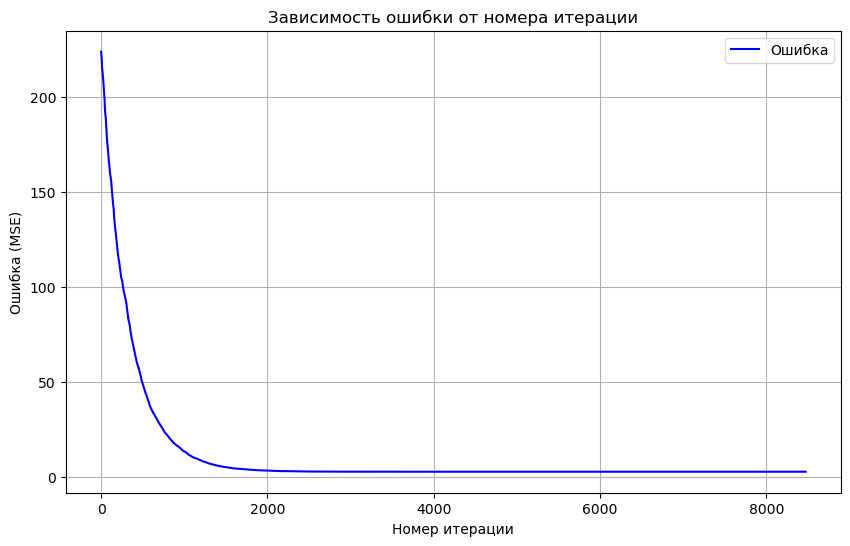

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Ошибка', color='blue')
plt.title('Зависимость ошибки от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid()
plt.legend()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [95]:
formatted_weights = [f"{weight:.6f}" for weight in weights.flatten()]
print("Финальные веса:", ", ".join(formatted_weights))

Финальные веса: 13.975072, 3.931287, 2.795896, 0.009317


**Выведите среднеквадратичную ошибку на последней итерации.**

In [91]:
print("MSE на последней итерации:", errors[-1])

MSE на последней итерации: 2.7876849101826546


<div style="border: 1px solid red; padding: 10px; border-radius: 5px;">

## Финальный вывод:

При обучению модели с использованием координатного спуска и стохастического градиентного спуска на выборке из 200 строк были получены следующие результаты:

- **Координатный спуск**:
  - Веса: `[41.56217205, 110.13144155, 73.52860638, -0.55006384]`
  - Количество итераций: менее 100
  - Ошибка (MSE): `2.7841`
  
- **Стохастический градиентный спуск**:
  - Веса: `[14.020895, 3.908592, 2.770160, -0.010786]`
  - Количество итераций: примерно 2000
  - Ошибка (MSE): `2.7847`

### Основные наблюдения:

1. **Количество итераций**<br>
Координатный спуск потребовал значительно меньше итераций для достижения минимальной ошибки по сравнению со стохастическим градиентным спуском.

2. **Веса**: <br>
Значения весов у двух методов сильно различаются, что связано с особенностями масштабирования и нормализации данных.

3. **Ошибка**:<br> 
Ошибки двух методов оказались почти идентичными, хотя стохастический градиентный спуск потребовал больше итераций для достижения этого результата.

### Причины различий:

- **Размер выборки**:<br> 
Поскольку выборка состоит всего из 200 строк, координатный спуск смог быстрее найти оптимальные веса, так как он обновляет веса по одному признаку за раз, и на небольших данных это может быть более эффективно.
  
- **Стохастический градиентный спуск**<br> 
обычно проявляет свои преимущества на больших наборах данных или в условиях онлайн-обучения, когда каждое обновление может быть выполнено на небольшом подмножестве данных, что делает его более масштабируемым.

</div>